In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/data.csv')

In [3]:
df.head()

,Unnamed: 0,contour,contrast,file_name,luminance,mean_color,mean_color_b,mean_color_g,mean_color_r,shannon_entropy,shape_index,solidity,year
0,0,0.000056,0.827169,../images/Rothko_guggenheim_org/1946_31.jpg,181.738624,"[195.04633161367624, 179.93297130025903, 160.4...",160.439238,179.932971,195.046332,6.768127,0.255747,Null,1946
1,1,0.000000,0.587802,../images/Rothko_guggenheim_org/1953_31.jpg,161.723046,"[228.9834626679892, 156.9777388801369, 10.6742...",10.674273,156.977739,228.983463,6.937948,0.255547,Null,1953
2,2,0.003758,0.853499,../images/Rothko_moma/1944_41.jpg,214.564295,"[217.90556421172752, 214.52938465589887, 205.0...",205.071415,214.529385,217.905564,6.519651,0.251697,Null,1944
3,3,0.000063,0.706196,../images/Rothko_moma/1951_41.jpg,184.080065,"[191.22959893724698, 183.47946451163966, 168.9...",168.976993,183.479465,191.229599,6.451747,NaN,Null,1951
4,4,0.000000,0.658131,../images/Rothko_moma/1949_41.jpg,224.799111,"[230.15480379293894, 224.6640326812977, 210.36...",210.366810,224.664033,230.154804,5.738259,0.251944,Null,1949


In [4]:
df.drop(['Unnamed: 0', 'file_name', 'mean_color', 'solidity'], axis=1, inplace=True)

In [5]:
df.columns

Index(['contour', 'contrast', 'luminance', 'mean_color_b', 'mean_color_g',
       'mean_color_r', 'shannon_entropy', 'shape_index', 'year'],
      dtype='object')

In [6]:
X = df['year'].values.reshape(-1, 1)
y = df['contour'].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (168, 1) (168, 1)


Text(0,0.5,'Head Size')

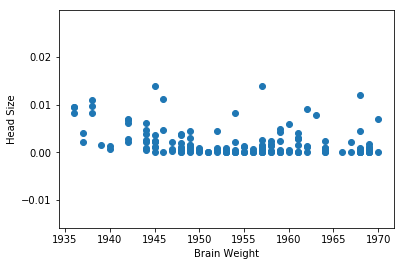

In [7]:
plt.scatter(X, y)
plt.xlabel("Brain Weight")
plt.ylabel("Head Size")

In [8]:
def check_linearity(df, col_one, col_two):
    X = df[col_one]
    y = df[col_two]
    
    fig, ax = plt.subplots()
    title = col_one.title()
    
    ax.scatter(X, y)
    ax.set_xlabel(col_one)
    ax.set_ylabel(col_two)
    ax.set_title(title)

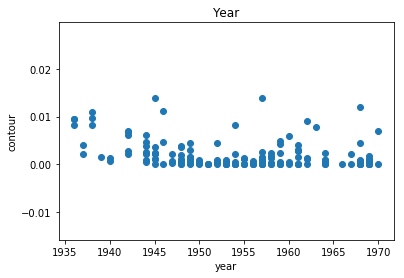

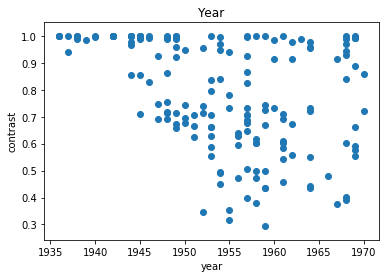

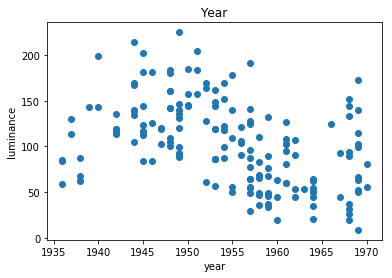

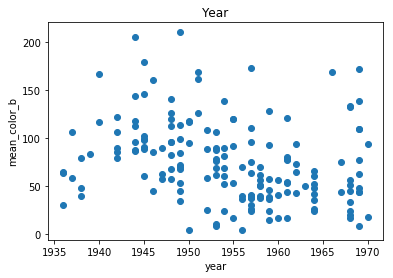

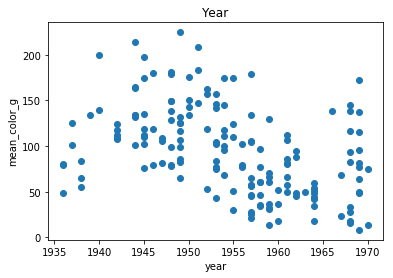

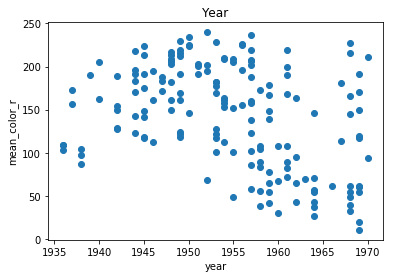

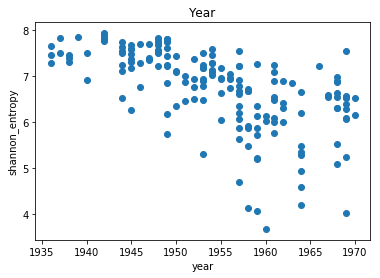

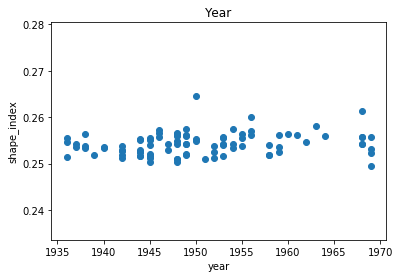

In [9]:
columns = ['contour', 'contrast', 'luminance', 'mean_color_b', 'mean_color_g',
       'mean_color_r', 'shannon_entropy', 'shape_index']

for column in columns:
    check_linearity(df, 'year', column)

In [10]:
# Figure out which columns have a correlation
regression_cols = []

for column in columns:
    corr = df['year'].corr(df[column])
    if abs(corr) >= 0.5:
        regression_cols.append(column)

In [11]:
regression_cols

['shannon_entropy']

In [12]:
X = df['year'].values.reshape(-1, 1)
y = df['shannon_entropy'].values.reshape(-1, 1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

/Users/acanois/anaconda2/envs/lab/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.4234461663756821
R-squared (R2 ): 0.4222276455560532


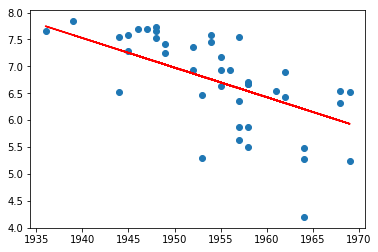

In [17]:
fig, ax = plt.subplots()

ax.scatter(X_test, y_test)
ax.plot(X_test, predicted, color='red')

In [18]:
import numpy as np
from sklearn.decomposition import PCA

In [25]:
df.columns

Index(['contour', 'contrast', 'luminance', 'mean_color_b', 'mean_color_g',
       'mean_color_r', 'shannon_entropy', 'shape_index', 'year'],
      dtype='object')

In [33]:
X = np.array(df)

In [37]:
pca = PCA(n_components=2)
pca.fit(X)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').